In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mlg_ulb_creditcardfraud_path = kagglehub.dataset_download('mlg-ulb/creditcardfraud')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


#**cridet card fruad**

# **Table of Contents**

1. [Problem Statement](#1)
2. [Importing libraries](#2)
3. [Reading dataset](#3)
4. [Exploring dataset](#4)
5. [Exploratory Data Analysis](#5)
6. [Data Preprocessing](#6)
7. [Correlation between Features](#8)
8. [Feature Scaling](#11)
9. [Features & Target Variables](#9)
10. [Building Machine Learning Models Without Feature Scaling](#10)
11. [Building Machine Learning Models with hyperParameter tuning](#13)
12. [Conclusion](#14)

# **Problem Statement:** <a class="anchor" id="1"></a>
[Table of Contents](#0.1)
>It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase

# **Importing libraries:** <a class="anchor" id="2"></a>
[Table of Contents](#0.2)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict, cross_validate, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# **Reading Dataset:** <a class="anchor" id="3"></a>
[Table of Contents](#0.3)

In [ ]:
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Exploring Dataset:** <a class="anchor" id="4"></a>
[Table of Contents](#0.4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


 ---
# **Observation:**
-There's no null values in any column of dataset

---

# **Exploratary Data Analysis(EDA):** <a class="anchor" id="5"></a>
[Table of Contents](#0.5)

In [ ]:
data['Class'].value_counts()

,count
Class,
0,284315
1,492


 ---
# **Observation:**
-the data is very Unbalanced

---

In [ ]:
print("Original class counts:")
print(data['Class'].value_counts())

sample_0 = data[data['Class'] == 0].sample(n=10000, replace=True, random_state=42)
sample_1 = data[data['Class'] == 1].sample(n=492, replace=True, random_state=42)

resampled_df = pd.concat([sample_0, sample_1])

resampled_df = resampled_df.sample(frac=1, random_state=42).reset_index(drop=True)




Original class counts:
Class
0    284315
1       492
Name: count, dtype: int64


##**resambled the data to more balanced form**

In [ ]:

print("\nResampled class counts:")
print(resampled_df['Class'].value_counts())

resampled_df.to_csv('resampled_data.csv', index=False)


Resampled class counts:
Class
0    10000
1      492
Name: count, dtype: int64


In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
resampled_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,69109.0,1.042459,0.090009,0.487253,1.349639,-0.183643,0.043789,0.048112,0.080981,-0.059552,...,-0.010593,0.116410,-0.085364,0.247146,0.609447,-0.347510,0.033196,0.014714,42.14,0
1,33618.0,1.274422,-0.097084,0.052789,0.442924,-0.012157,0.142331,-0.123238,-0.012499,0.650624,...,-0.379695,-0.984210,-0.113434,-0.982370,0.488686,0.370248,-0.030770,0.005832,33.35,0
2,27307.0,1.155819,-0.132901,-0.322069,-0.163635,0.036389,-0.498508,0.306928,-0.138707,-0.277069,...,-0.396651,-1.416493,0.021271,-0.485542,0.149168,0.647712,-0.121629,-0.000547,89.99,0
3,59589.0,0.722363,-0.786026,0.721446,1.369359,-0.655804,1.022308,-0.492605,0.499133,0.839018,...,0.143805,0.303762,-0.189528,-0.298001,0.382089,-0.246345,0.046422,0.035127,171.14,0
4,31697.0,-0.360797,1.299099,0.162635,3.025405,-0.031178,-0.470911,1.042713,0.083735,-1.993928,...,0.321617,0.681426,0.370227,0.414654,-0.970983,0.074159,0.089003,0.182000,126.64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,35890.0,1.105092,-0.783717,1.117596,0.939940,-1.150218,0.726599,-0.845752,0.234345,-0.169163,...,-0.731101,-1.315967,0.022671,-0.024877,0.410003,-0.542867,0.091460,0.034976,67.78,0
10488,161179.0,-0.009248,-4.199168,-3.978385,0.253043,-0.609257,-0.483662,1.913779,-0.689444,-1.390668,...,0.613838,-0.361813,-1.132282,0.456427,0.079919,0.867988,-0.358400,0.102494,1178.00,0
10489,41101.0,-2.638598,-5.642003,-2.225067,3.907636,-1.514933,0.391891,3.122194,-0.650708,-1.574364,...,1.225549,-1.036578,-1.917953,0.107335,0.023386,-0.141546,-0.418265,0.344019,1995.18,0
10490,170343.0,-6.390769,5.256621,-4.118097,-0.865763,-3.689628,-1.070149,-3.953118,5.154138,-0.139700,...,0.200934,-0.932823,0.657623,0.474175,0.213703,-0.313506,-1.445187,-0.231389,0.77,0


/tmp/ipython-input-13-1331146295.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(resampled_df['Class'], sort = True).sort_index()


Text(0, 0.5, 'Frequency')

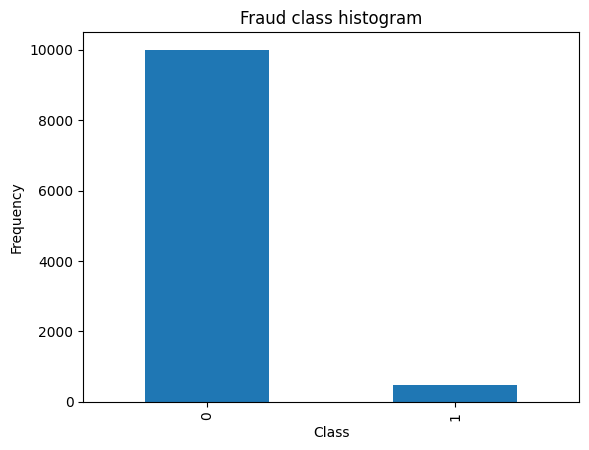

In [ ]:
count_classes = pd.value_counts(resampled_df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

##over sampling the data (*second form*)

In [ ]:

X = resampled_df.drop('Class', axis=1)
y = resampled_df['Class']

print("Original class distribution:", Counter(y))


smote = SMOTE(
    sampling_strategy=1.0,
    random_state=42,
    k_neighbors=5
)

X_resampled, y_resampled = smote.fit_resample(X, y)


resampled_df1 = pd.concat([
    pd.DataFrame(X_resampled),
    pd.DataFrame(y_resampled, columns=['Class'])
], axis=1)


print("Resampled class distribution:", Counter(y_resampled))


resampled_df1.to_csv('smote_oversampled_data.csv', index=False)

Original class distribution: Counter({0: 10000, 1: 492})
Resampled class distribution: Counter({0: 10000, 1: 10000})


/tmp/ipython-input-15-1132511747.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  _classes = pd.value_counts(resampled_df1['Class'], sort = True).sort_index()


Text(0, 0.5, 'Frequency')

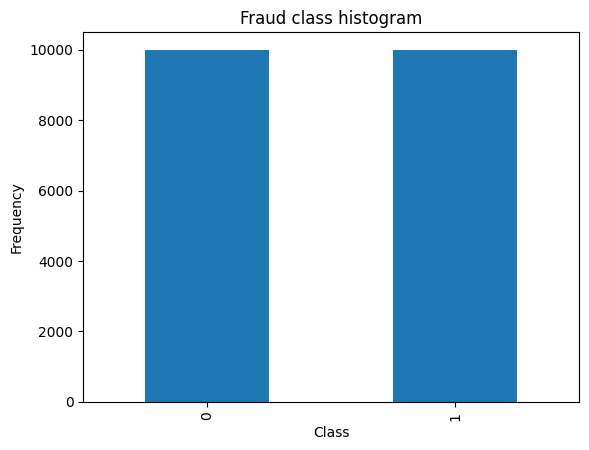

In [ ]:
_classes = pd.value_counts(resampled_df1['Class'], sort = True).sort_index()
_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
print("Original class counts:")
print(data['Class'].value_counts())

sample_2 = data[data['Class'] == 0].sample(n=5000, replace=True, random_state=42)
sample_3 = data[data['Class'] == 1].sample(n=492, replace=True, random_state=42)

resampled_df2 = pd.concat([sample_2, sample_3])

resampled_df2 = resampled_df2.sample(frac=1, random_state=42).reset_index(drop=True)


X = resampled_df2.drop('Class', axis=1)
y = resampled_df2['Class']

print("Original class distribution:", Counter(y))


smote = SMOTE(
    sampling_strategy=.5,
    random_state=42,
    k_neighbors=5
)

X_resampled, y_resampled = smote.fit_resample(X, y)


resampled_df2 = pd.concat([
    pd.DataFrame(X_resampled),
    pd.DataFrame(y_resampled, columns=['Class'])
], axis=1)


print("Resampled class distribution:", Counter(y_resampled))


resampled_df2.to_csv('smote_oversampled_data.csv', index=False)

Original class counts:
Class
0    284315
1       492
Name: count, dtype: int64
Original class distribution: Counter({0: 5000, 1: 492})
Resampled class distribution: Counter({0: 5000, 1: 2500})


/tmp/ipython-input-17-2358841035.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  __classes = pd.value_counts(resampled_df2['Class'], sort = True).sort_index()


Text(0, 0.5, 'Frequency')

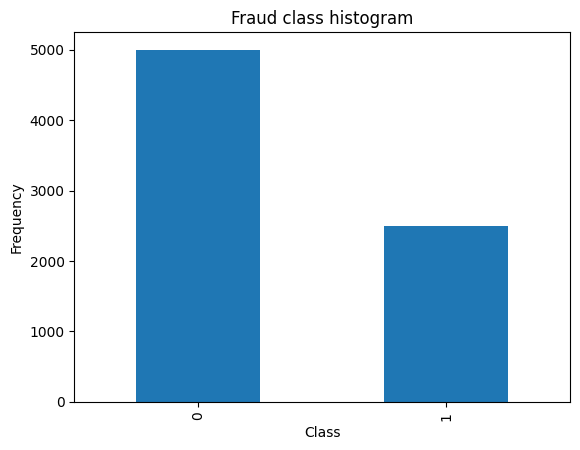

In [ ]:
__classes = pd.value_counts(resampled_df2['Class'], sort = True).sort_index()
__classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

##correlation matrix

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(
    corr_matrix,
    annot=True,  # Show values
    fmt=".2f",   # 2 decimal places
    cmap="coolwarm",  # Red (positive) vs. Blue (negative)
    vmin=-1, vmax=1,  # Fix scale from -1 to 1
    linewidths=0.5
)
plt.title("Correlation Matrix Heatmap")
plt.show()

NameError: name 'corr_matrix' is not defined

<Figure size 2000x1500 with 0 Axes>

In [ ]:
corr_matrix = resampled_df.corr()

# Focus on correlations with 'Class'
class_corr = corr_matrix['Class'].sort_values(ascending=False)
print("Top features correlated with 'Class':\n", class_corr)


Top features correlated with 'Class':
 Class     1.000000
V11       0.582041
V4        0.554010
V2        0.384676
V19       0.177410
V21       0.153526
V20       0.091902
V27       0.050299
V28       0.031129
V8        0.026139
Amount    0.025746
V26       0.021026
V25       0.015100
V23       0.012316
V22       0.001369
V13      -0.012100
V15      -0.013670
V24      -0.049205
Time     -0.062150
V6       -0.196730
V5       -0.363579
V1       -0.398566
V9       -0.429177
V18      -0.429504
V7       -0.521254
V3       -0.579336
V16      -0.598549
V10      -0.628774
V17      -0.639332
V12      -0.696186
V14      -0.769769
Name: Class, dtype: float64


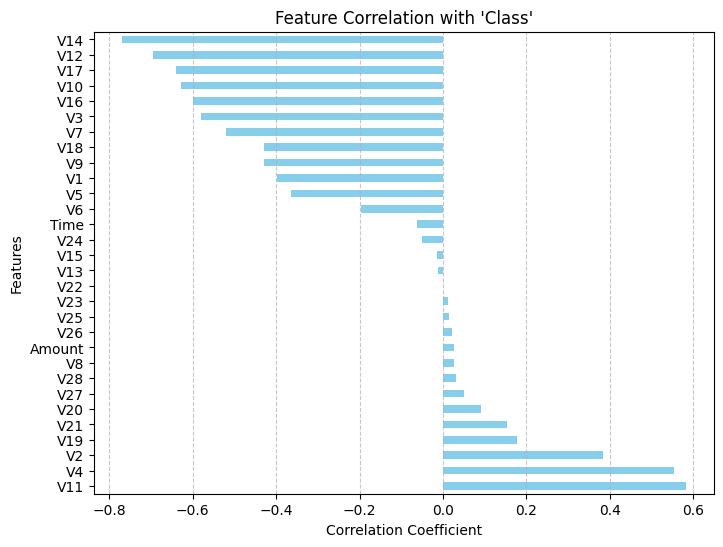

In [ ]:
plt.figure(figsize=(8, 6))
class_corr.drop('Class').plot.barh(color='skyblue')
plt.title("Feature Correlation with 'Class'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
strong_corr = class_corr[abs(class_corr) > 0.2].index.tolist()
print("Features strongly correlated with 'Class':", strong_corr)

Features strongly correlated with 'Class': ['Class', 'V11', 'V4', 'V2', 'V5', 'V1', 'V9', 'V18', 'V7', 'V3', 'V16', 'V10', 'V17', 'V12', 'V14']


Explained variance ratio: [9.99975095e-01 2.47985217e-05]


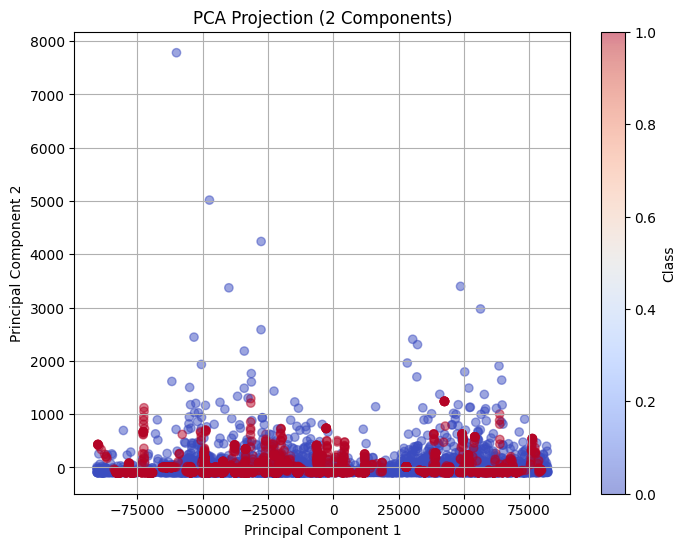

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions (we keep top 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

# Explained variance tells how much info each component captures
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Visualize the PCA projection
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_resampled, cmap='coolwarm', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (2 Components)')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

 ---
# **Observation:**
-Top feature --> v11

-bottom feature -->v22

---

In [ ]:
resampled_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    20000 non-null  float64
 1   V1      20000 non-null  float64
 2   V2      20000 non-null  float64
 3   V3      20000 non-null  float64
 4   V4      20000 non-null  float64
 5   V5      20000 non-null  float64
 6   V6      20000 non-null  float64
 7   V7      20000 non-null  float64
 8   V8      20000 non-null  float64
 9   V9      20000 non-null  float64
 10  V10     20000 non-null  float64
 11  V11     20000 non-null  float64
 12  V12     20000 non-null  float64
 13  V13     20000 non-null  float64
 14  V14     20000 non-null  float64
 15  V15     20000 non-null  float64
 16  V16     20000 non-null  float64
 17  V17     20000 non-null  float64
 18  V18     20000 non-null  float64
 19  V19     20000 non-null  float64
 20  V20     20000 non-null  float64
 21  V21     20000 non-null  float64
 22

In [ ]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10492 entries, 0 to 10491
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10492 non-null  float64
 1   V1      10492 non-null  float64
 2   V2      10492 non-null  float64
 3   V3      10492 non-null  float64
 4   V4      10492 non-null  float64
 5   V5      10492 non-null  float64
 6   V6      10492 non-null  float64
 7   V7      10492 non-null  float64
 8   V8      10492 non-null  float64
 9   V9      10492 non-null  float64
 10  V10     10492 non-null  float64
 11  V11     10492 non-null  float64
 12  V12     10492 non-null  float64
 13  V13     10492 non-null  float64
 14  V14     10492 non-null  float64
 15  V15     10492 non-null  float64
 16  V16     10492 non-null  float64
 17  V17     10492 non-null  float64
 18  V18     10492 non-null  float64
 19  V19     10492 non-null  float64
 20  V20     10492 non-null  float64
 21  V21     10492 non-null  float64
 22

#scalling the 3 forms of data we made using satander scaler

In [ ]:

amount = resampled_df['Amount'].values.reshape(-1, 1)
scaler = StandardScaler()

resampled_df['Amount_Scaled'] = scaler.fit_transform(amount)

resampled_df.drop(['Amount','Time'], axis=1, inplace=True)

In [ ]:


amount = resampled_df1['Amount'].values.reshape(-1, 1)
scaler = StandardScaler()

resampled_df1['Amount_Scaled'] = scaler.fit_transform(amount)

resampled_df1.drop(['Amount','Time'], axis=1, inplace=True)

In [ ]:
amount = resampled_df2['Amount'].values.reshape(-1, 1)
scaler = StandardScaler()

resampled_df2['Amount_Scaled'] = scaler.fit_transform(amount)

resampled_df2.drop(['Amount','Time'], axis=1, inplace=True)

In [ ]:

resampled_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled
0,1.042459,0.090009,0.487253,1.349639,-0.183643,0.043789,0.048112,0.080981,-0.059552,0.014119,...,-0.010593,0.116410,-0.085364,0.247146,0.609447,-0.347510,0.033196,0.014714,0,-0.196760
1,1.274422,-0.097084,0.052789,0.442924,-0.012157,0.142331,-0.123238,-0.012499,0.650624,-0.231382,...,-0.379695,-0.984210,-0.113434,-0.982370,0.488686,0.370248,-0.030770,0.005832,0,-0.234048
2,1.155819,-0.132901,-0.322069,-0.163635,0.036389,-0.498508,0.306928,-0.138707,-0.277069,-0.003447,...,-0.396651,-1.416493,0.021271,-0.485542,0.149168,0.647712,-0.121629,-0.000547,0,0.006221
3,0.722363,-0.786026,0.721446,1.369359,-0.655804,1.022308,-0.492605,0.499133,0.839018,-0.178782,...,0.143805,0.303762,-0.189528,-0.298001,0.382089,-0.246345,0.046422,0.035127,0,0.350462
4,-0.360797,1.299099,0.162635,3.025405,-0.031178,-0.470911,1.042713,0.083735,-1.993928,0.569800,...,0.321617,0.681426,0.370227,0.414654,-0.970983,0.074159,0.089003,0.182000,0,0.161691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,1.105092,-0.783717,1.117596,0.939940,-1.150218,0.726599,-0.845752,0.234345,-0.169163,0.554365,...,-0.731101,-1.315967,0.022671,-0.024877,0.410003,-0.542867,0.091460,0.034976,0,-0.087995
10488,-0.009248,-4.199168,-3.978385,0.253043,-0.609257,-0.483662,1.913779,-0.689444,-1.390668,0.689491,...,0.613838,-0.361813,-1.132282,0.456427,0.079919,0.867988,-0.358400,0.102494,0,4.621595
10489,-2.638598,-5.642003,-2.225067,3.907636,-1.514933,0.391891,3.122194,-0.650708,-1.574364,-0.030625,...,1.225549,-1.036578,-1.917953,0.107335,0.023386,-0.141546,-0.418265,0.344019,0,8.088099
10490,-6.390769,5.256621,-4.118097,-0.865763,-3.689628,-1.070149,-3.953118,5.154138,-0.139700,-1.869897,...,0.200934,-0.932823,0.657623,0.474175,0.213703,-0.313506,-1.445187,-0.231389,0,-0.372253


In [ ]:
resampled_df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled
0,1.042459,0.090009,0.487253,1.349639,-0.183643,0.043789,0.048112,0.080981,-0.059552,0.014119,...,-0.010593,0.116410,-0.085364,0.247146,0.609447,-0.347510,0.033196,0.014714,0,-0.249688
1,1.274422,-0.097084,0.052789,0.442924,-0.012157,0.142331,-0.123238,-0.012499,0.650624,-0.231382,...,-0.379695,-0.984210,-0.113434,-0.982370,0.488686,0.370248,-0.030770,0.005832,0,-0.291362
2,1.155819,-0.132901,-0.322069,-0.163635,0.036389,-0.498508,0.306928,-0.138707,-0.277069,-0.003447,...,-0.396651,-1.416493,0.021271,-0.485542,0.149168,0.647712,-0.121629,-0.000547,0,-0.022824
3,0.722363,-0.786026,0.721446,1.369359,-0.655804,1.022308,-0.492605,0.499133,0.839018,-0.178782,...,0.143805,0.303762,-0.189528,-0.298001,0.382089,-0.246345,0.046422,0.035127,0,0.361919
4,-0.360797,1.299099,0.162635,3.025405,-0.031178,-0.470911,1.042713,0.083735,-1.993928,0.569800,...,0.321617,0.681426,0.370227,0.414654,-0.970983,0.074159,0.089003,0.182000,0,0.150938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-15.260604,8.317665,-22.329403,11.885729,-8.713976,-2.323109,-16.189280,0.504318,-6.334143,-13.176903,...,-2.356994,1.068639,1.084687,-1.039731,-0.183436,0.649771,2.149470,-1.406698,1,-0.444738
19996,-1.676110,1.287970,-0.896966,2.523189,-1.898775,-1.000772,-2.351005,0.812457,-1.321468,-2.791902,...,0.590993,0.450117,0.133533,0.346200,-0.119220,0.550137,0.426535,0.144561,1,-0.075171
19997,-7.518953,6.770559,-7.649661,7.827657,-5.491832,0.484240,-11.238922,-5.038514,-4.702843,-7.643733,...,-3.060588,1.077359,0.631751,-0.018785,-0.813582,0.053370,-0.738246,0.058940,1,-0.388967
19998,-20.864494,12.510835,-23.276445,6.159113,-15.803156,-4.402814,-16.081376,13.902247,-3.935817,-8.755605,...,1.756359,-1.493809,-0.880205,0.127959,1.428187,-0.223480,1.562955,0.465339,1,0.024587


In [ ]:
resampled_df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled
0,-0.228162,0.726999,1.392962,-0.710395,0.750302,-0.190966,0.859682,-0.171063,-0.553046,-0.307276,...,-0.235030,-0.605131,-0.175267,-0.503104,-0.055543,-0.050246,-0.200309,-0.234551,0,-0.395297
1,2.364865,-1.355716,-1.328351,-1.704573,-0.858332,-0.426907,-1.033970,-0.207997,-1.126323,1.582788,...,-0.234686,-0.143521,0.109958,-1.086895,-0.051938,-0.091894,0.009079,-0.063047,0,-0.340193
2,-0.701777,0.835319,1.258009,0.153989,0.289988,-1.104462,0.578744,-0.212904,-0.390183,-0.459033,...,-0.196105,-0.637209,0.071406,0.348678,-0.229312,0.028668,-0.256064,0.073996,0,-0.384674
3,2.192436,-0.675095,-1.800508,-0.899475,0.267376,0.100656,-0.352270,-0.155734,-0.957187,1.100130,...,-0.137189,0.130269,-0.012159,-0.288540,0.091089,0.802665,-0.068326,-0.072260,0,-0.286190
4,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,-8.303239,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,1,0.019505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,-0.900019,2.702944,-6.060853,3.935442,1.142968,-2.738365,-1.427928,0.218284,-1.727068,-5.238865,...,0.136640,-0.494196,0.275220,-0.617092,0.144378,-0.381626,0.142266,-0.132179,1,-0.400259
7496,-8.549011,6.000523,-13.140475,8.591816,-9.034599,-3.114456,-11.412374,5.448210,-5.032476,-12.414382,...,2.221778,-0.063704,0.072730,0.602873,-0.583390,-0.177254,0.106935,-0.073704,1,0.351452
7497,0.031056,0.914646,-4.589072,3.479230,0.740950,-0.964187,0.716195,-0.257532,-1.611872,-1.873452,...,0.166597,0.412081,-0.114565,-0.131443,-0.080018,-0.023255,0.551800,0.307231,1,0.769493
7498,-4.628083,4.295324,-7.655051,7.491749,-5.762670,-2.817149,-10.568484,3.174298,-5.963816,-11.380586,...,2.304362,0.766007,-0.406106,0.528881,-0.267885,0.197976,2.168393,0.632818,1,-0.173348


In [ ]:

X_resampled_df = resampled_df.drop('Class', axis=1)
y_resampled_df = resampled_df['Class']

X_resampled_df1 = resampled_df1.drop('Class', axis=1)
y_resampled_df1 = resampled_df1['Class']

X_resampled_df2 = resampled_df2.drop('Class', axis=1)
y_resampled_df2 = resampled_df2['Class']

#cross validation

In [ ]:

datasets = {
    'resampled_df': (X_resampled_df, y_resampled_df),
    'resampled_df1': (X_resampled_df1, y_resampled_df1),
    'resampled_df2': (X_resampled_df2, y_resampled_df2)
}

# Define cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models
models = {
    'LogisticRegression': LogisticRegression(random_state=42, solver='liblinear'),
    'SVC': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=40),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
}

# Custom scoring
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1': make_scorer(f1_score, average='weighted', zero_division=0),
}

all_results = {}

for dataset_name, (X, y) in datasets.items():
    print(f"\nEvaluating models on dataset: {dataset_name}")
    y = y.values.ravel() if isinstance(y, pd.Series) else y.ravel()

    results = []

    for name, model in models.items():
        print(f"  Cross-validating {name}...")
        try:
            scores = cross_validate(model, X, y, cv=cv, scoring=scoring, error_score='raise')

            results.append({
                'Model': name,
                'Accuracy': np.mean(scores['test_accuracy']),
                'Precision': np.mean(scores['test_precision']),
                'Recall': np.mean(scores['test_recall']),
                'F1-Score': np.mean(scores['test_f1']),
            })
        except Exception as e:
            print(f"  Error during cross-validation for {name}: {e}")
            results.append({
                'Model': name,
                'Accuracy': None,
                'Precision': None,
                'Recall': None,
                'F1-Score': None,
            })

    results_df = pd.DataFrame(results)
    all_results[dataset_name] = results_df

    print(f"\n--- Cross-Validation Results for {dataset_name} ---")
    display(results_df.sort_values(by='Accuracy', ascending=False))
    print("\n" + "="*50 + "\n")



Evaluating models on dataset: resampled_df
  Cross-validating LogisticRegression...
  Cross-validating SVC...
  Cross-validating KNN...
  Cross-validating Decision Tree...
  Cross-validating Random Forest...
  Cross-validating GradientBoostingClassifier...

--- Cross-Validation Results for resampled_df ---


,Model,Accuracy,Precision,Recall,F1-Score
4,Random Forest,0.997141,0.997126,0.997141,0.997111
5,GradientBoostingClassifier,0.994377,0.994367,0.994377,0.994347
1,SVC,0.992661,0.992642,0.992661,0.992395
2,KNN,0.992375,0.992247,0.992375,0.992174
0,LogisticRegression,0.992089,0.992007,0.992089,0.991822
3,Decision Tree,0.990755,0.991192,0.990755,0.990910





Evaluating models on dataset: resampled_df1
  Cross-validating LogisticRegression...
  Cross-validating SVC...
  Cross-validating KNN...
  Cross-validating Decision Tree...
  Cross-validating Random Forest...
  Cross-validating GradientBoostingClassifier...

--- Cross-Validation Results for resampled_df1 ---


,Model,Accuracy,Precision,Recall,F1-Score
4,Random Forest,0.99745,0.997455,0.99745,0.99745
2,KNN,0.99555,0.995584,0.99555,0.99555
3,Decision Tree,0.98950,0.989526,0.98950,0.98950
5,GradientBoostingClassifier,0.98930,0.989336,0.98930,0.98930
1,SVC,0.97410,0.974854,0.97410,0.97409
0,LogisticRegression,0.96970,0.970315,0.96970,0.96969





Evaluating models on dataset: resampled_df2
  Cross-validating LogisticRegression...
  Cross-validating SVC...
  Cross-validating KNN...
  Cross-validating Decision Tree...
  Cross-validating Random Forest...
  Cross-validating GradientBoostingClassifier...

--- Cross-Validation Results for resampled_df2 ---


,Model,Accuracy,Precision,Recall,F1-Score
4,Random Forest,0.991467,0.991522,0.991467,0.991444
2,KNN,0.990267,0.990311,0.990267,0.990277
5,GradientBoostingClassifier,0.986533,0.986599,0.986533,0.986491
3,Decision Tree,0.979333,0.979486,0.979333,0.979374
1,SVC,0.974667,0.975305,0.974667,0.974432
0,LogisticRegression,0.972933,0.973261,0.972933,0.972740


#confusion matrices , feature importance


--- Results for resampled_df ---

Model Performance Metrics (sorted by Precision):
                        Model  Accuracy  Precision    Recall  F1-Score
4               Random Forest  0.997141   0.997126  0.997141  0.997111
5  GradientBoostingClassifier  0.994377   0.994367  0.994377  0.994347
1                         SVC  0.992661   0.992642  0.992661  0.992395
2                         KNN  0.992375   0.992247  0.992375  0.992174
0          LogisticRegression  0.992089   0.992007  0.992089  0.991822
3               Decision Tree  0.990755   0.991192  0.990755  0.990910


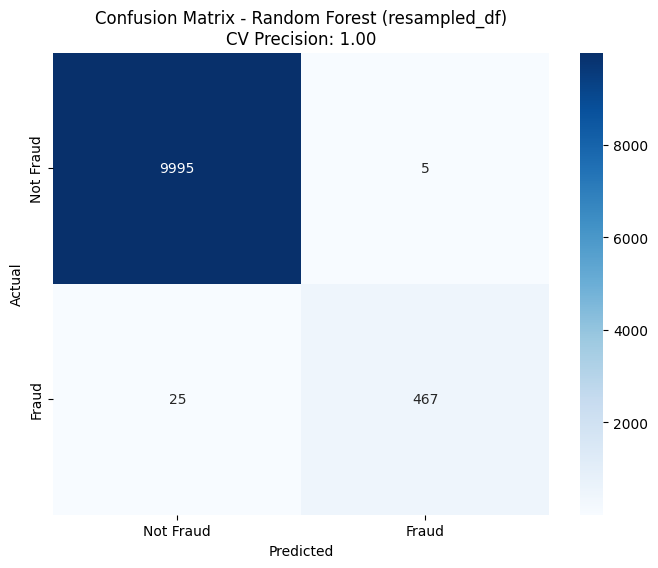

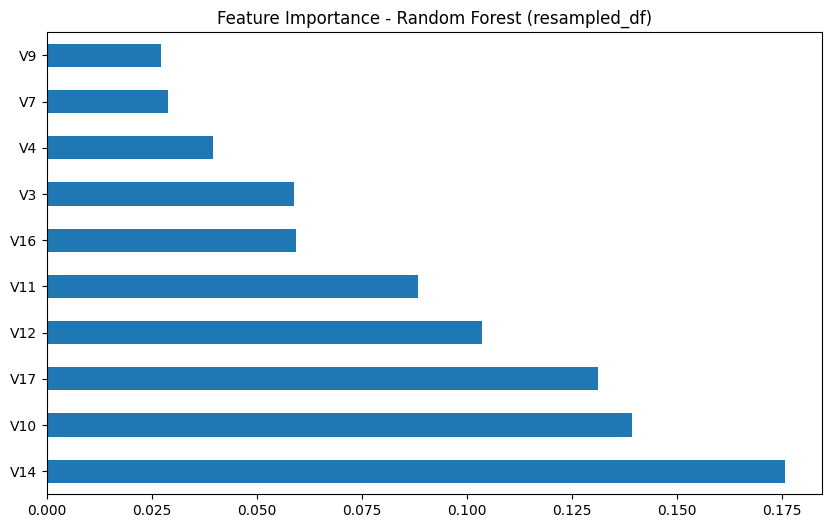


--- Results for resampled_df1 ---

Model Performance Metrics (sorted by Precision):
                        Model  Accuracy  Precision   Recall  F1-Score
4               Random Forest   0.99745   0.997455  0.99745   0.99745
2                         KNN   0.99555   0.995584  0.99555   0.99555
3               Decision Tree   0.98950   0.989526  0.98950   0.98950
5  GradientBoostingClassifier   0.98930   0.989336  0.98930   0.98930
1                         SVC   0.97410   0.974854  0.97410   0.97409
0          LogisticRegression   0.96970   0.970315  0.96970   0.96969


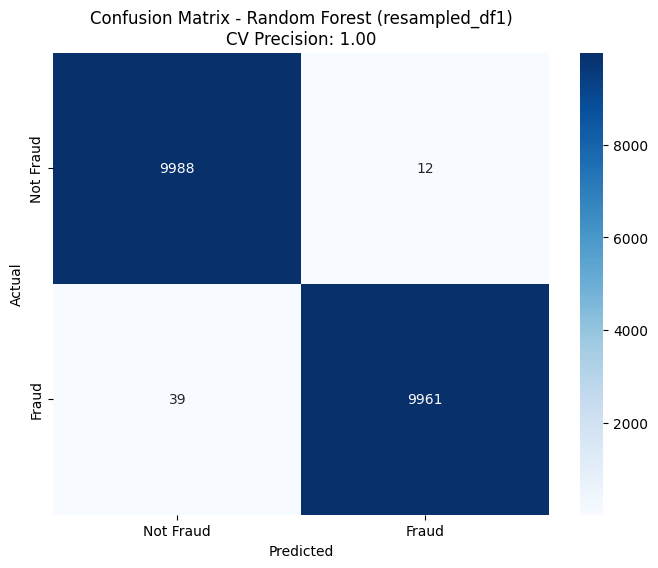

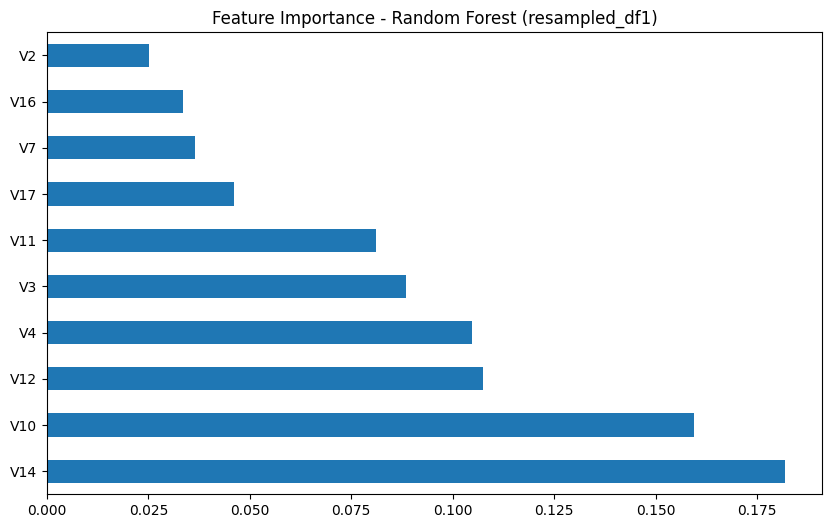


--- Results for resampled_df2 ---

Model Performance Metrics (sorted by Precision):
                        Model  Accuracy  Precision    Recall  F1-Score
4               Random Forest  0.991467   0.991522  0.991467  0.991444
2                         KNN  0.990267   0.990311  0.990267  0.990277
5  GradientBoostingClassifier  0.986533   0.986599  0.986533  0.986491
3               Decision Tree  0.979333   0.979486  0.979333  0.979374
1                         SVC  0.974667   0.975305  0.974667  0.974432
0          LogisticRegression  0.972933   0.973261  0.972933  0.972740


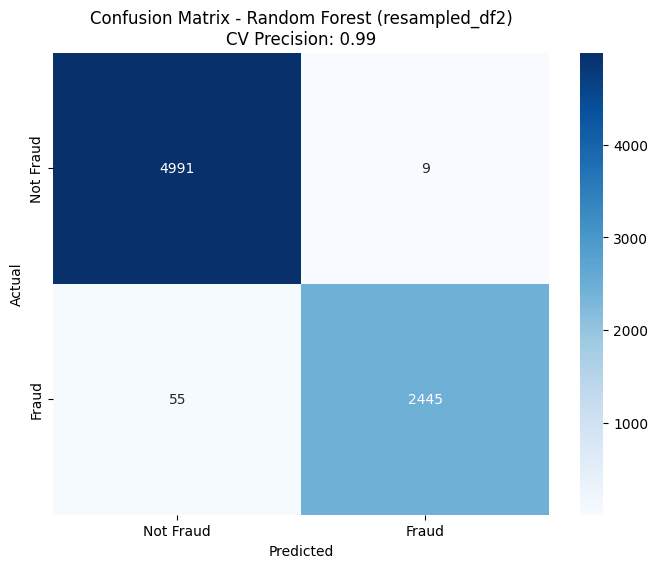

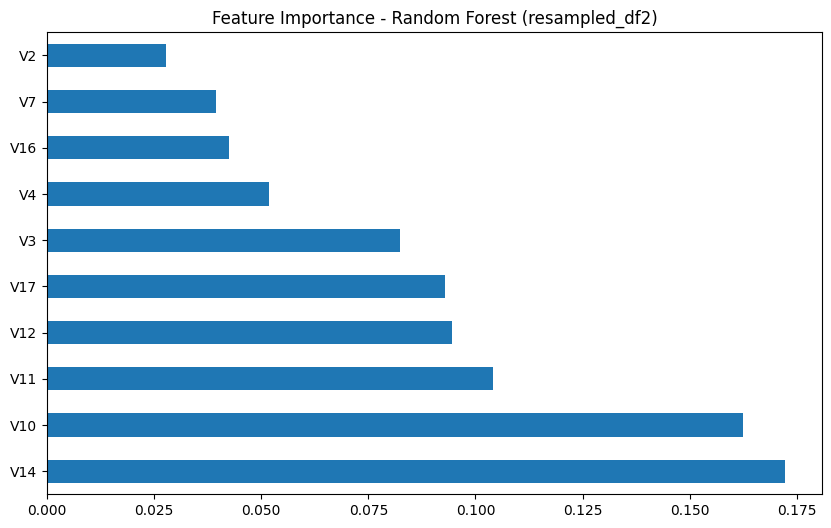

In [ ]:
for dataset_name, (X, y) in datasets.items():
    print(f"\n--- Results for {dataset_name} ---")
    results_df = all_results[dataset_name]

    # نعرض الموديلات مرتبة حسب Precision
    print("\nModel Performance Metrics (sorted by Precision):")
    print(results_df.sort_values('Precision', ascending=False))

    # نختار أفضل موديل بناءً على Precision
    best_model_name = results_df.loc[results_df['Precision'].idxmax(), 'Model']

    y = y.values.ravel() if isinstance(y, pd.Series) else y.ravel()

    # إعادة بناء أفضل موديل
    if best_model_name == 'LogisticRegression':
        best_model_instance = LogisticRegression(random_state=42, solver='liblinear')
    elif best_model_name == 'SVC':
        best_model_instance = SVC(random_state=42)
    elif best_model_name == 'KNN':
        best_model_instance = KNeighborsClassifier()
    elif best_model_name == 'Decision Tree':
        best_model_instance = DecisionTreeClassifier(random_state=42)
    elif best_model_name == 'Random Forest':
        best_model_instance = RandomForestClassifier(random_state=40)
    elif best_model_name == 'GradientBoostingClassifier':
        best_model_instance = GradientBoostingClassifier(random_state=42)
    else:
        print(f"Model {best_model_name} not recognized.")
        continue

    # توقعات cross-validation لتكوين confusion matrix
    y_pred = cross_val_predict(best_model_instance, X, y, cv=cv)

    cm = confusion_matrix(y, y_pred)
    precision_value = results_df.loc[results_df["Model"] == best_model_name, "Precision"].values[0]

    # رسم Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {best_model_name} ({dataset_name})\nCV Precision: {precision_value:.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # تدريب الموديل على كامل الداتا لرسم feature importance
    best_model_instance.fit(X, y)

    if hasattr(best_model_instance, 'feature_importances_'):
        plt.figure(figsize=(10, 6))
        feature_importance = pd.Series(best_model_instance.feature_importances_, index=X.columns)
        feature_importance.nlargest(10).plot(kind='barh')
        plt.title(f'Feature Importance - {best_model_name} ({dataset_name})')
        plt.show()



--- Bar Chart for resampled_df ---


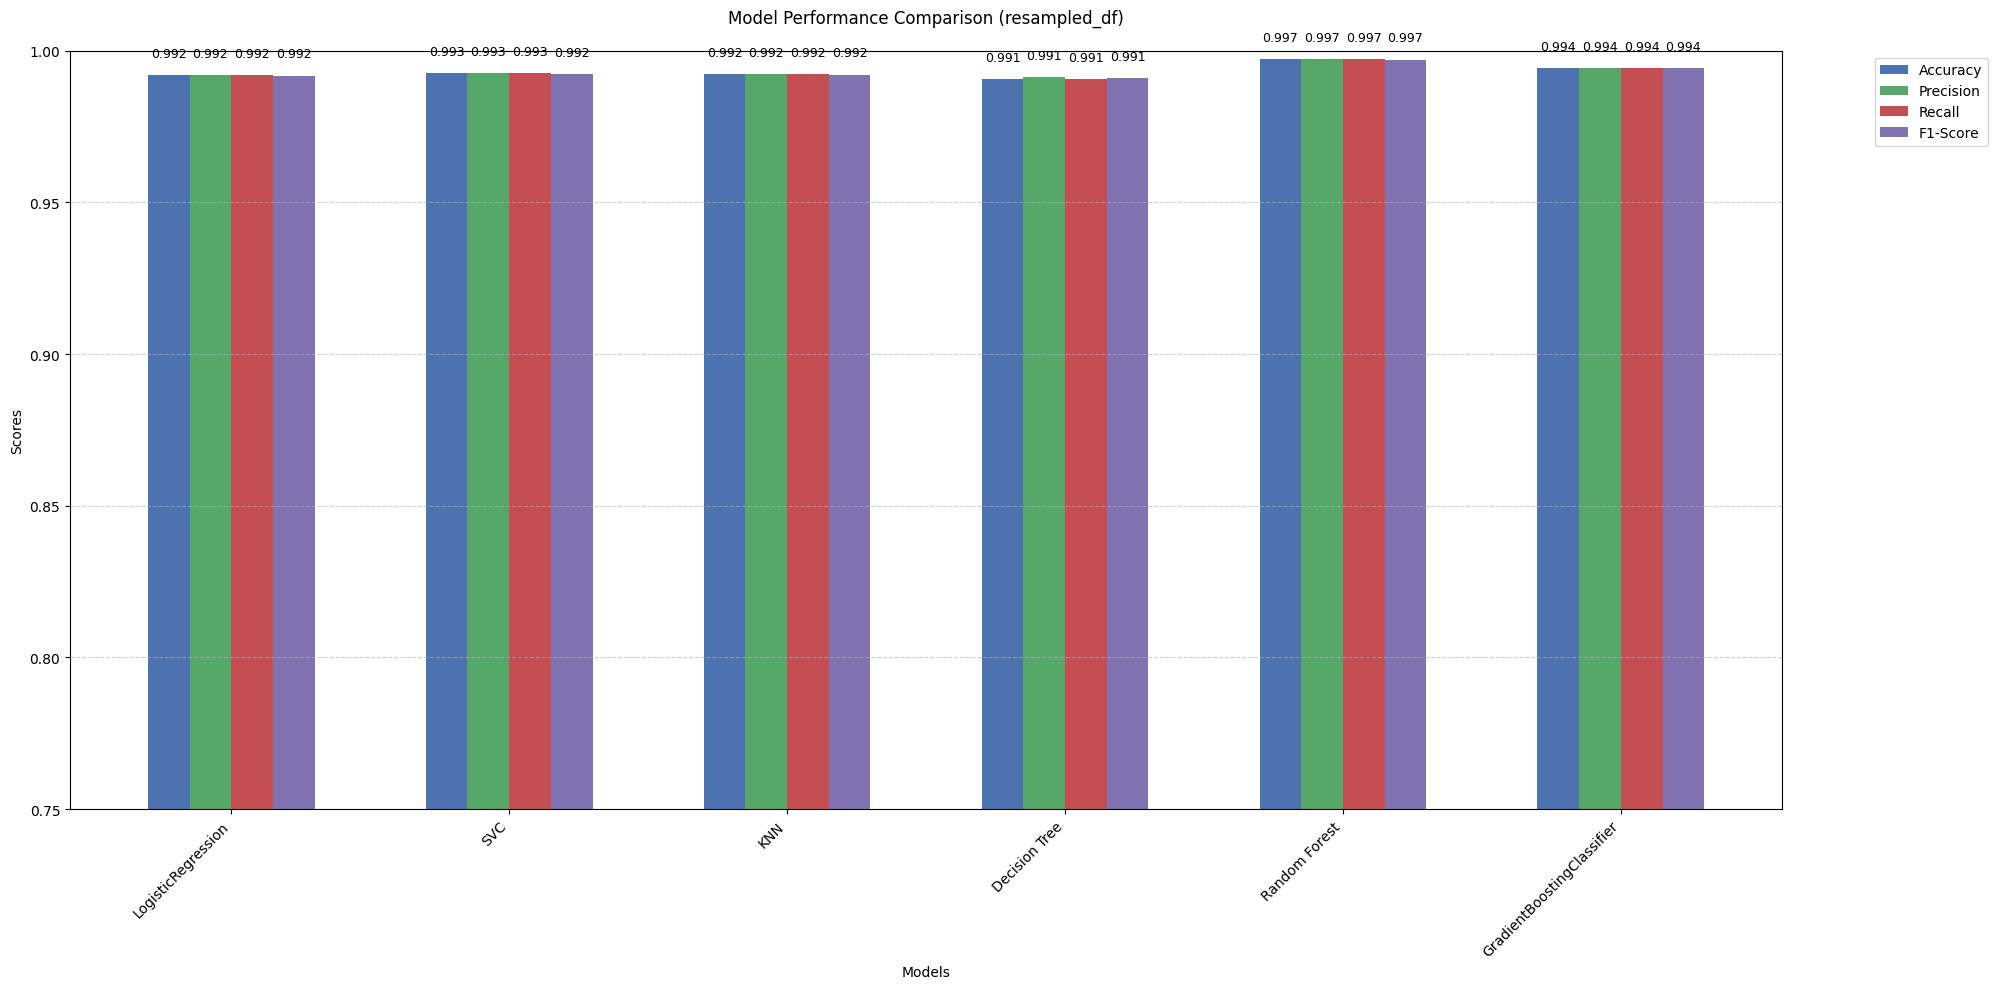


--- Bar Chart for resampled_df1 ---


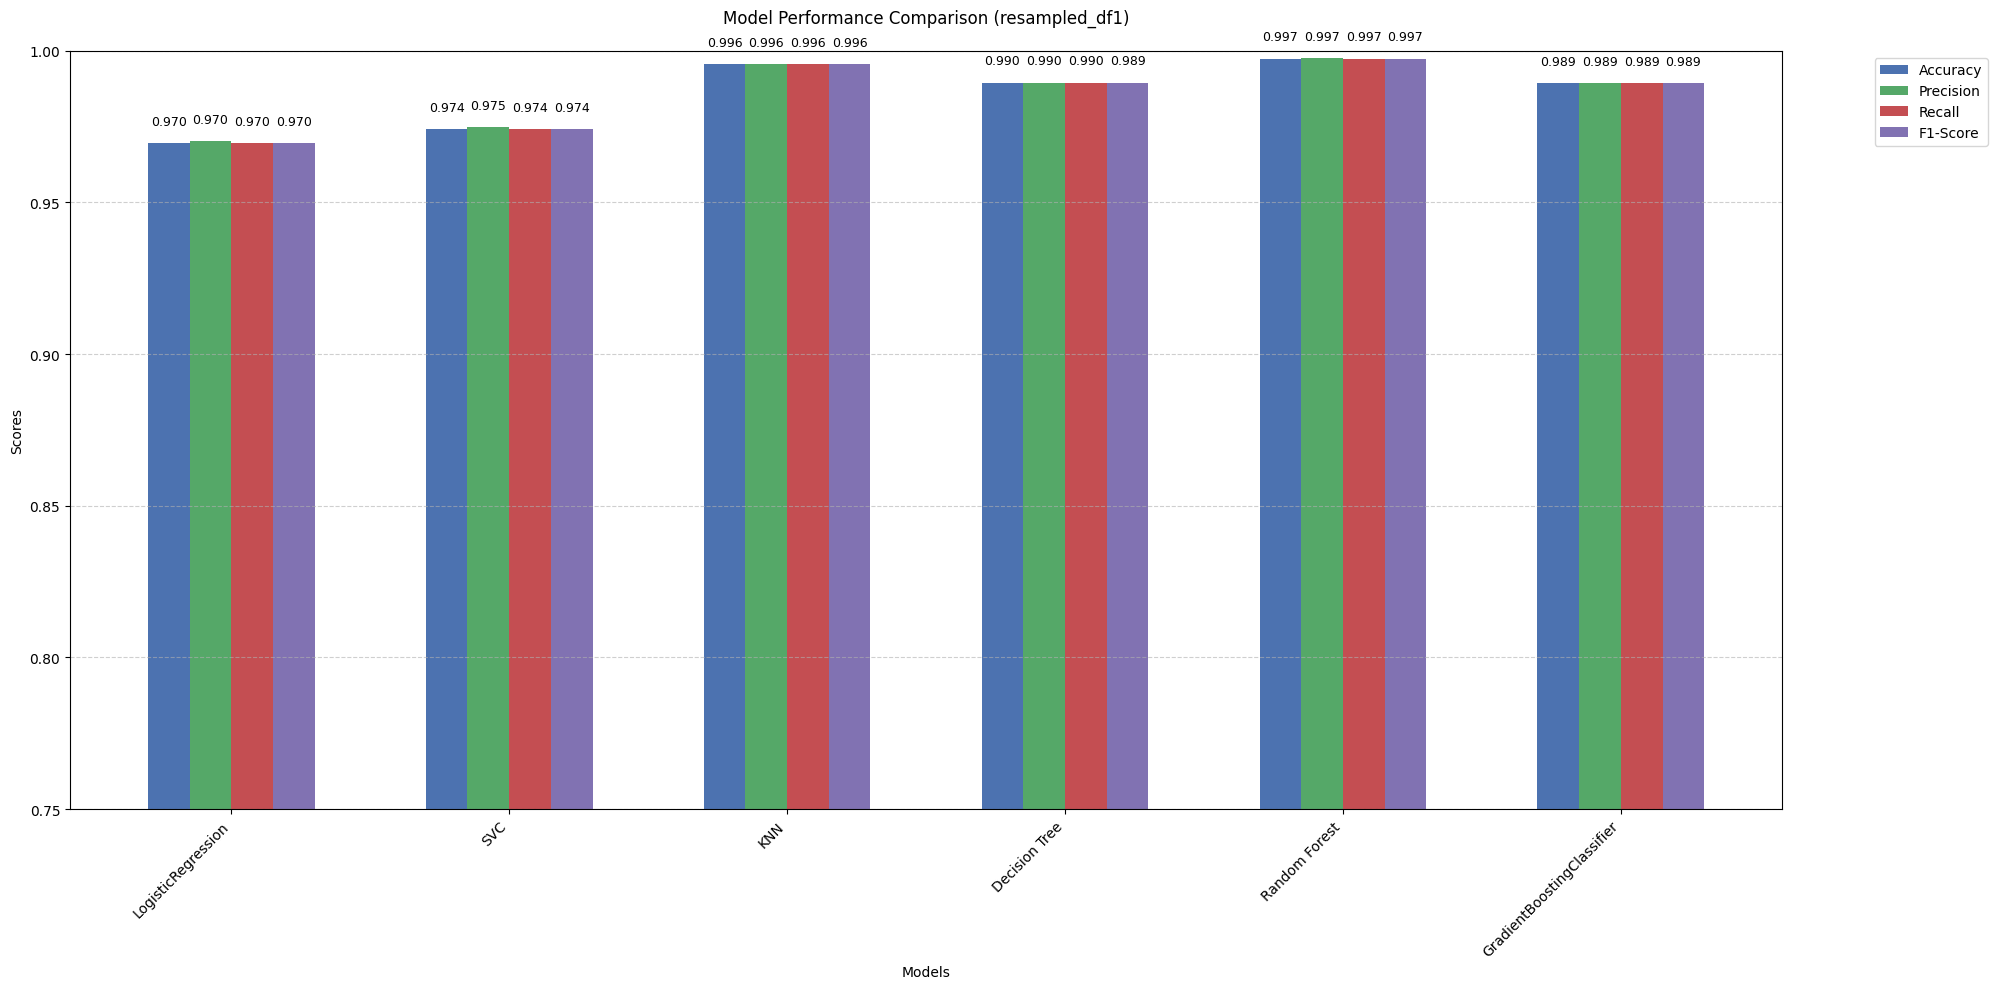


--- Bar Chart for resampled_df2 ---


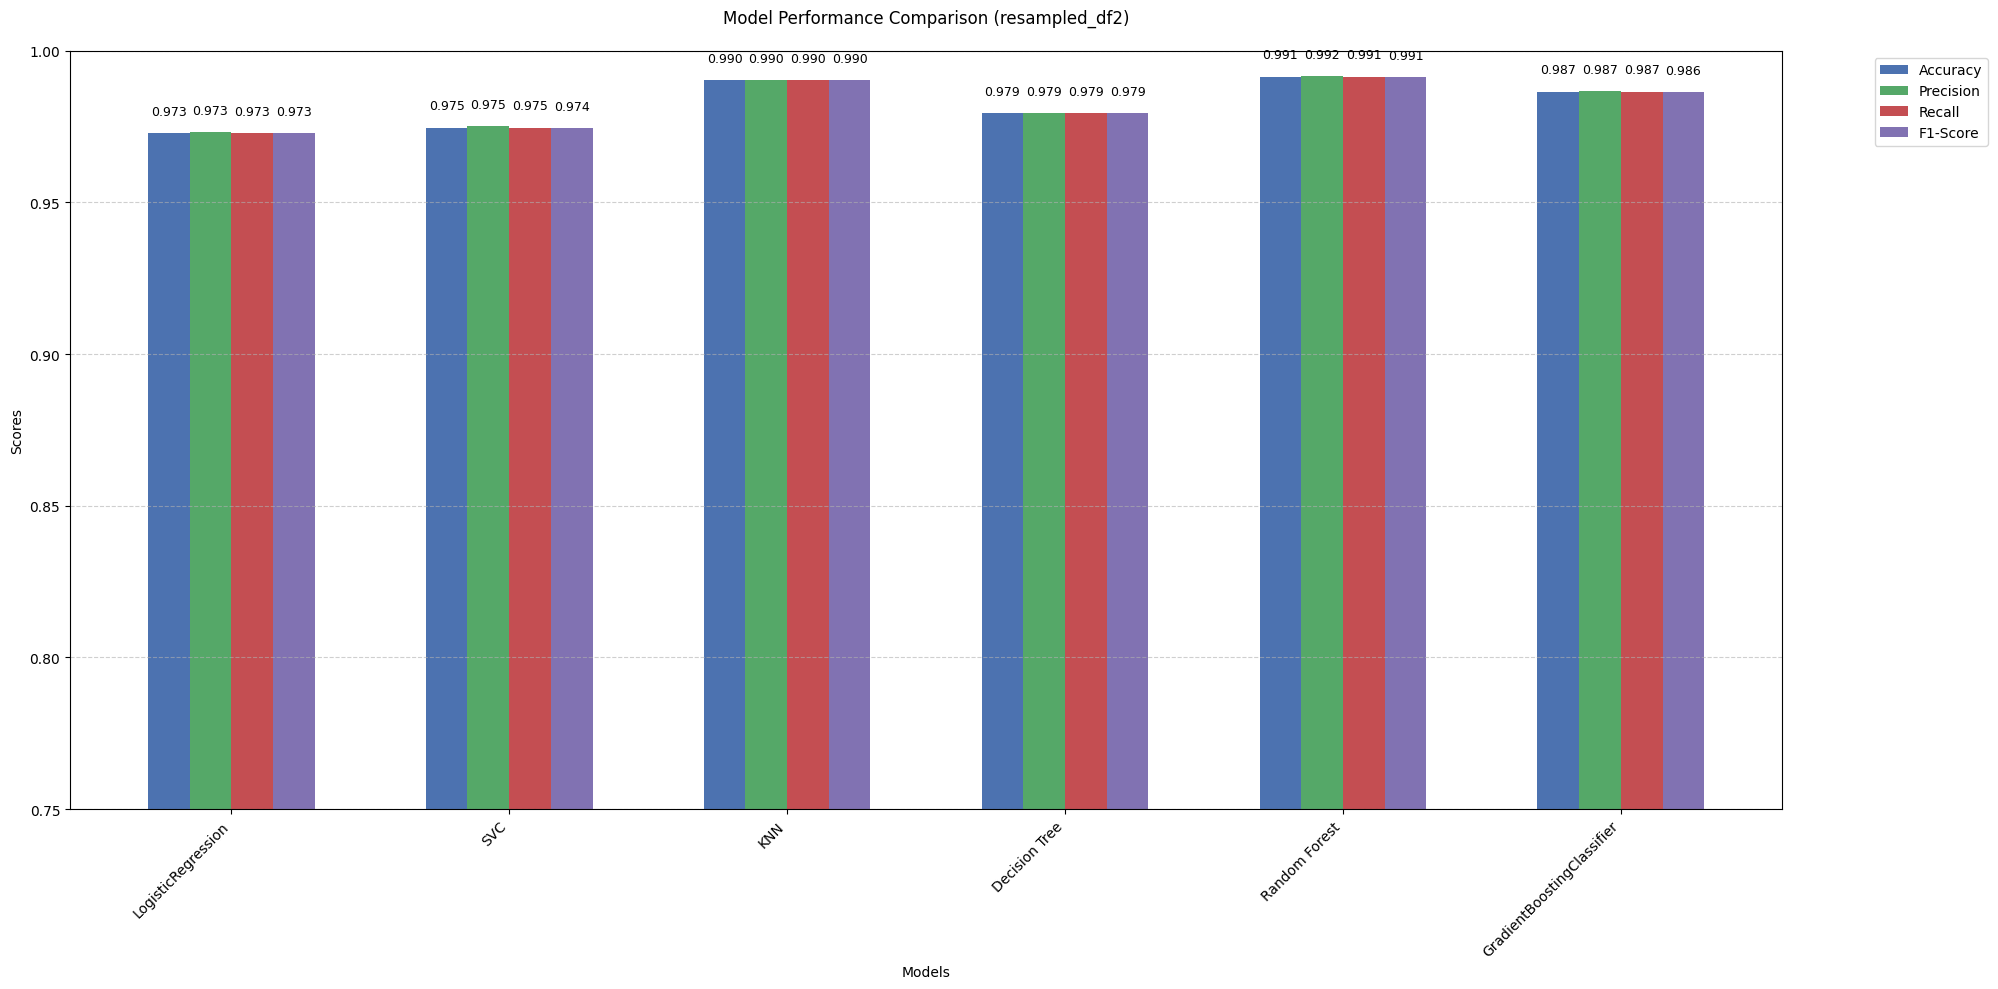

In [ ]:
for dataset_name, results_df in all_results.items():
    print(f"\n--- Bar Chart for {dataset_name} ---")
    plt.figure(figsize=(20, 10))
    x = np.arange(len(results_df))
    width = 0.15 # Adjust width as needed
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']
    for i, metric in enumerate(metrics):
        plt.bar(x + i*width, results_df[metric], width, label=metric, color=colors[i])
        # Add value labels
        for j, val in enumerate(results_df[metric]):
            if pd.notna(val): # Check if the value is not NaN
                plt.text(x[j] + i*width, val + 0.005, f'{val:.3f}',
                        ha='center', va='bottom', fontsize=9) # Adjust font size

    plt.xlabel('Models')
    plt.ylabel('Scores')
    plt.title(f'Model Performance Comparison ({dataset_name})', pad=20)
    plt.xticks(x + width*1.5, results_df['Model'], rotation=45, ha='right')
    plt.ylim(0.750, 1.0) # Adjust y-limit if needed based on your data
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, axis='y', linestyle='--', alpha=0.6) # Add horizontal grid lines
    plt.tight_layout()
    plt.show()



🔍 Starting hyperparameter tuning on resampled_df...

🔧 Tuning: LogisticRegression
✅ Best Recall (Fraud): 0.8516
🔧 Tuning: SVC
✅ Best Recall (Fraud): 0.8923
🔧 Tuning: KNN
✅ Best Recall (Fraud): 0.9512
🔧 Tuning: Decision Tree
✅ Best Recall (Fraud): 0.9289
🔧 Tuning: Random Forest
✅ Best Recall (Fraud): 0.9492
🔧 Tuning: GradientBoostingClassifier
✅ Best Recall (Fraud): 0.9268

📊 Final Results (sorted by Recall on Fraud Class):


,Recall (Fraud Class),F1-Score (Fraud Class),CV Precision (weighted avg)
KNN,0.95122,0.956078,0.995884
Random Forest,0.949187,0.96888,0.997125
Decision Tree,0.928862,0.904055,0.991053
GradientBoostingClassifier,0.926829,0.939238,0.994322
SVC,0.892276,0.932059,0.993823
LogisticRegression,0.851626,0.909881,0.991993


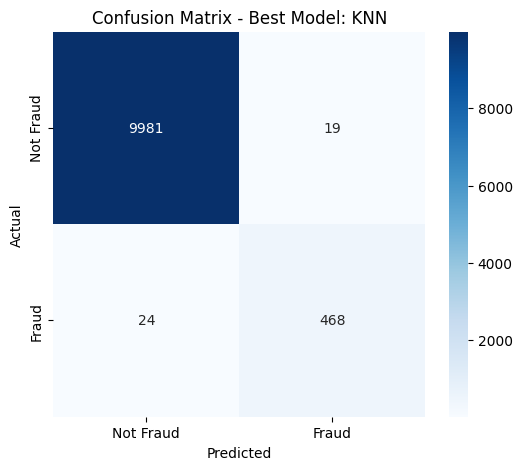

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

dataset_name = 'resampled_df'
X, y = X_resampled_df, y_resampled_df
y = y.values.ravel() if isinstance(y, pd.Series) else y.ravel()

models_for_tuning = {
    'LogisticRegression': LogisticRegression(random_state=42, solver='liblinear'),
    'SVC': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=40),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
}

param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1.0, 10.0],
        'penalty': ['l2'],
        'solver': ['liblinear'],
    },
    'SVC': {
        'C': [0.1, 1.0, 10.0],
        'kernel': ['rbf', 'poly', 'linear'],
        'gamma': ['scale', 'auto'],
        'probability': [True],  # Needed if you want to use ROC AUC later
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree'],
        'metric': ['minkowski', 'manhattan'],  # euclidean = minkowski with p=2
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2'],
    },
    'GradientBoostingClassifier': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'min_samples_split': [2, 5],
    },
}



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


tuned_results = {}

print(f"\n🔍 Starting hyperparameter tuning on {dataset_name}...\n")

for name, model in models_for_tuning.items():
    print(f"🔧 Tuning: {name}")
    try:
        grid = GridSearchCV(model, param_grids[name], cv=3, scoring='recall', n_jobs=-1)
        grid.fit(X, y)

        best_model = grid.best_estimator_

        # Get predictions using cross_val_predict
        y_pred = cross_val_predict(best_model, X, y, cv=cv)
        report = classification_report(y, y_pred, output_dict=True, zero_division=0)
        cm = confusion_matrix(y, y_pred)

        tuned_results[name] = {
            'Best Parameters': grid.best_params_,
            'CV Recall (weighted avg)': report['weighted avg']['recall'],
            'CV Precision (weighted avg)': report['weighted avg']['precision'],
            'CV F1-Score (weighted avg)': report['weighted avg']['f1-score'],
            'Recall (Fraud Class)': report['1']['recall'] if '1' in report else 0,
            'F1-Score (Fraud Class)': report['1']['f1-score'] if '1' in report else 0,
            'Confusion Matrix': cm
        }

        print(f"✅ Best Recall (Fraud): {report['1']['recall']:.4f}")
    except Exception as e:
        print(f"❌ Error tuning {name}: {e}")
        tuned_results[name] = {
            'Best Parameters': None,
            'CV Recall (weighted avg)': None,
            'CV Precision (weighted avg)': None,
            'CV F1-Score (weighted avg)': None,
            'Recall (Fraud Class)': None,
            'F1-Score (Fraud Class)': None,
            'Confusion Matrix': None
        }


tuned_results_df = pd.DataFrame(tuned_results).T
tuned_results_df_sorted = tuned_results_df.sort_values('Recall (Fraud Class)', ascending=False)

print("\n📊 Final Results (sorted by Recall on Fraud Class):")
display(tuned_results_df_sorted[['Recall (Fraud Class)', 'F1-Score (Fraud Class)', 'CV Precision (weighted avg)']])


best_model_name = tuned_results_df_sorted.index[0]
cm = tuned_results[best_model_name]['Confusion Matrix']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title(f"Confusion Matrix - Best Model: {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 366.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib
import random

# 1: Load the trained model
model = joblib.load("fraud_detector_rf.pkl")

# 2: Define features
selected_features = ['V1', 'V3', 'V5', 'V7', 'V10', 'V12', 'V14', 'V17', 'V20', 'Amount_Scaled']
all_features = [
    'V1','V2','V3','V4','V5','V6','V7','V8','V9',
    'V10','V11','V12','V13','V14','V15','V16','V17','V18','V19',
    'V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount_Scaled'
]

# 3: App Header
st.title("💳 Credit Card Fraud Detector")
st.write("Enter transaction details below or click **Autofill** to populate sample values.")

# Autofill
autofill = st.button("🔁 Autofill Example")

# Input form
user_input = {}
for feat in selected_features:
    if autofill:

        default_val = round(random.uniform(-5, 5), 2)
        user_input[feat] = default_val
        st.number_input(label=feat, value=default_val, key=feat)
    else:
        user_input[feat] = st.number_input(label=feat, value=0.0, key=feat)

# building the full feature vector expected fddf
default_full = {f: user_input.get(f, 0.0) for f in all_features}
input_df = pd.DataFrame([default_full])

# predict please
if st.button("🚨 Predict Fraud?"):
    pred = model.predict(input_df)[0]
    prob = model.predict_proba(input_df)[0][1]
    st.subheader("🧾 Prediction Result")
    st.write(f"**Prediction:** {'⚠️ FRAUD' if pred == 1 else '✅ Not Fraud'}")
    st.write(f"**Confidence (Fraud Probability):** {prob:.2f}")

# Display Input Data
st.write("---")
st.write("🔍 Your Input Data:")
st.dataframe(input_df)



Writing app.py


In [ ]:
import joblib
joblib.dump(best_model_instance, "fraud_detector_rf.pkl")


['fraud_detector_rf.pkl']

In [ ]:
from google.colab import files
files.download("fraud_detector_rf.pkl")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>